<a href="https://colab.research.google.com/github/MoloZzz/nn/blob/main/lec8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/MoloZzz/nn/main/telecom_churn.csv%20-%20telecom_churn.csv.csv"
df = pd.read_csv(url)

1. Вивести зміст перших 5 рядків з файлу telecom_churn.csv.

In [4]:
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


2. Вивести розмір даних (кількість рядків і стовбців), назву ознак
та їх типи. Чи є пропуски даний у таблиці?

In [12]:
print("Розмір даних (кількість рядків і стовбців):", df.shape)
print("Назви стовбців:", df.columns)

print("Типи ознак:")
print(df.dtypes)

# Перевірка на наявність пропусків
missing_values = df.isnull().sum()
print("Пропуски в таблиці:")
print(missing_values)

Розмір даних (кількість рядків і стовбців): (3333, 20)
Назви стовбців: Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')
Типи ознак:
State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night c

3. Змінити тип даних для стовпчика Churn на int64.

In [19]:
df['Churn'] = df['Churn'].astype('int64')

print(type(df['Churn'][0]))

<class 'numpy.int64'>


4. Виконати сортування по Account length за спаданням.

In [21]:
sorted_data = df.sort_values(by='Account length', ascending=False)
sorted_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
817,UT,243,510,No,No,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2,0
1408,NM,232,408,No,No,0,165.6,104,28.15,195.9,115,16.65,118.3,77,5.32,11.8,3,3.19,1,0
1751,WY,225,415,No,No,0,182.7,142,31.06,246.5,63,20.95,218.0,103,9.81,8.8,2,2.38,1,0
1551,MI,225,415,No,No,0,165.4,106,28.12,273.7,109,23.26,210.0,93,9.45,8.7,3,2.35,0,1
1886,ID,224,510,No,No,0,111.4,133,18.94,175.0,66,14.88,217.2,106,9.77,5.5,6,1.49,3,0


5. Надати відповідь на питання: яка максимальна довжина
міжнародних дзвінків серед лояльних користувачів (Churn ==
0), що не користуються послугою міжнародного роумінгу (
'International plan' == 'No')?

In [22]:
df[(df["Churn"] == 0) & (df["International plan"] == "No")]["Total intl minutes"].max()

18.9

або інший варіант

In [23]:
# фільтруємо
loyal_users = df[(df['Churn'] == 0) & (df['International plan'] == 'No')]

# виводимо максмум
max_intl_call_duration = loyal_users['Total intl minutes'].max()

print("Максимальна довжина міжнародних дзвінків серед лояльних користувачів без міжнародного роумінгу:", max_intl_call_duration)

Максимальна довжина міжнародних дзвінків серед лояльних користувачів без міжнародного роумінгу: 18.9


6. Порахувати загальну кількість дзвінків (Total day charge, Total
eve charge, Total night charge) для всіх користувачів. Результат
занести у новий стовпчик Total charge.

In [25]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge']
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,72.86
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,55.54
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,59.00
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,65.02
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,49.36


7. Зробити графічну інтерпретацію попереднього пункту для 10
користувачів за максимальними показниками, що формують
Total charge. Значення Total day charge, Total eve charge, Total
night charge, Total charge повинні відображатися графічно.

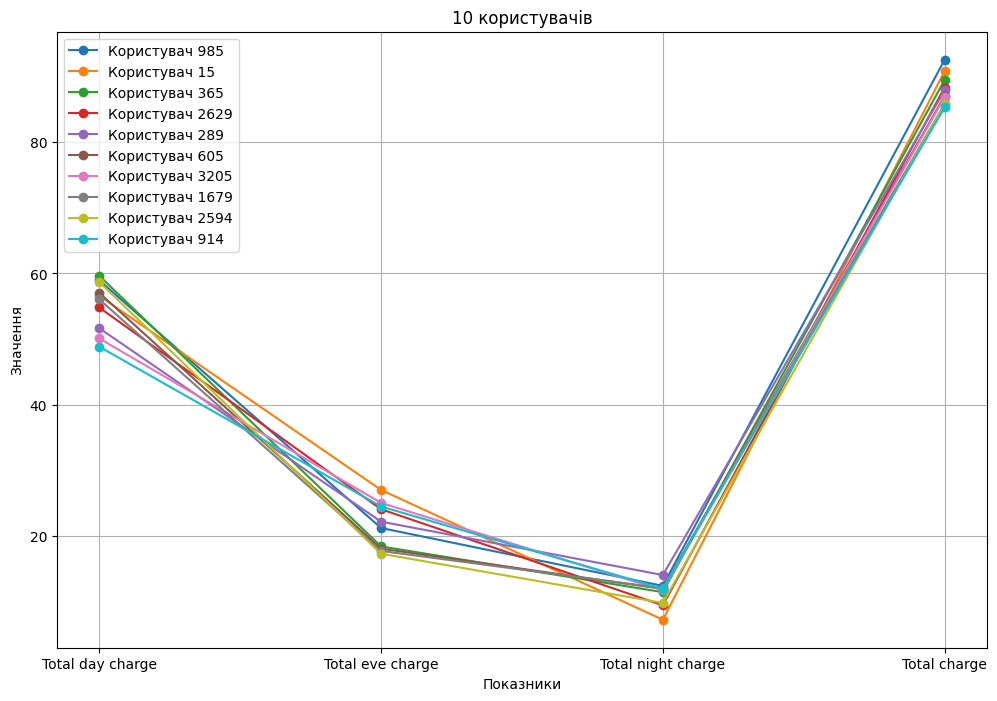

In [36]:
import matplotlib.pyplot as plt

# фільтруємо топ 10
top_10_users = df.nlargest(10, 'Total charge')

top_10_users.head(100)

plt.figure(figsize=(12, 8))
for i, user in top_10_users.iterrows():
    plt.plot(['Total day charge', 'Total eve charge', 'Total night charge', 'Total charge'],
             [user['Total day charge'], user['Total eve charge'], user['Total night charge'], user['Total charge']],
             marker='o', label=f'Користувач {user.name}')

plt.title("10 користувачів")
plt.xlabel("Показники")
plt.ylabel("Значення")
plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='State'>

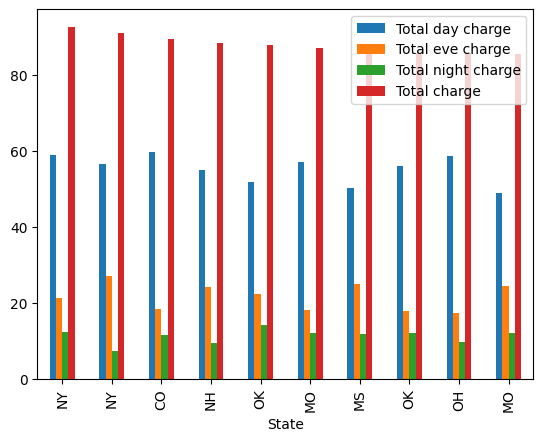

In [35]:
top_10_users.plot(kind="bar", x="State", y=["Total day charge", "Total eve charge", "Total night charge", "Total charge"])

8. Побудувати і вивести графічну інтерпретацію багатошарової
моделі персептрона для бінарної класифікації. Модель повинна
мати 8 входів, 4 прихованих шарів з 15, 10 15 та 20 нейронами
і вихідний шар з 1 виходом. Функції лінійної активації
використовуються в кожному прихованому шарі, а функція
активації сигмоїда використовується в вихідному шарі для
двійковій класифікації.

In [ ]:
# Незнаю